### Econ 176 APIs Day 2 - and ***first computing assignment***

We're back! [Here was Day 1](https://colab.research.google.com/drive/1laKhKCXTFtCAGKrOqQfisbGPyQE-xexm#scrollTo=nCAN5xmzEP9t&uniqifier=1)

<font size="-1">Today, we'll continue building familiarity with APIs through calling and analyzing the results (using Python, of course!)

#### Where were we?

We had tried the International Space Station API at [http://api.open-notify.org/iss-now.json](http://api.open-notify.org/iss-now.json) :

In [ ]:
# we assign the url and obtain the api-call result into result
#    Note that result will be an object that contains many fields (not a simple string)
#

import requests

url = "http://api.open-notify.org/iss-now.json"   # this is sometimes called an "endpoint" ...
result = requests.get(url)
result

# if it succeeds, you should see <Response [200]>

<Response [200]>

In [ ]:
#
# In this case, we know the result is a JSON file, and we can obtain it that way:

json_contents = result.json()      # needs to convert the text to a json dictionary...
print(f"json_contents is {json_contents}")     # Aha!  Let's re/introduce f-strings...

# Take a look... remember that a json object is a Python dictionary:

json_contents is {'iss_position': {'longitude': '170.3405', 'latitude': '51.2147'}, 'message': 'success', 'timestamp': 1739657012}


In [ ]:
#
# Let's remind ourselves how dictionaries work:

lat = json_contents['iss_position']['latitude']
lat = float(lat)
print("lat: ", lat)

lat:  51.2147


Here is a function that returns the distance detween two (lat/long) pairs:


<font size="-2">

```   
def haversine(lat1, long1, lat2, long2):
    """
    Calculate the great circle distance in kilometers between two points
    on the earth (specified in decimal degrees)
    """
    from math import *
    # convert decimal degrees to radians
    long1, lat1, long2, lat2 = map(radians, [long1, lat1, long2, lat2])

    # haversine formula
    dlong = long2 - long1
    dlat = lat2 - lat1
    trig = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlong/2)**2
    # Radius of earth. Use 3956 for miles. 6371 for km.
    radius = 3956  # we'll use miles!
    return radius * 2 * asin(sqrt(trig))
```
</font>

#### <font color="Coral"><b>Task 0</b></font> &nbsp;&nbsp; Let's, together, create a program that finds the distance from the ISS to Claremont
+ It can just be a cell, it doesn't have to be its own function.
+ But, let's definitely use the haversine function, above...





In [ ]:
#
# Let's make sure we "unpack the process" w/o AI
#
from math import *

lat = json_contents['iss_position']['latitude']
lat = float(lat)

long = json_contents['iss_position']['longitude']
long = float(long)

def haversine(lat1, long1, lat2, long2):
    """
    Calculate the great circle distance in kilometers between two points
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians
    long1, lat1, long2, lat2 = map(radians, [long1, lat1, long2, lat2])

    # haversine formula
    dlong = long2 - long1
    dlat = lat2 - lat1
    trig = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlong/2)**2
    # Radius of earth. Use 3956 for miles. 6371 for km.
    radius = 3956  # we'll use miles!
    return radius * 2 * asin(sqrt(trig))

print(haversine(lat, long, 34.1007, -117.7065))

3679.6636535680386


In [ ]:
#
# Then, let's compare with AI's result...
#

from geopy.distance import geodesic

def calculate_distance(coord1, coord2):
    """
    Calculates the geodesic distance between two latitude/longitude pairs.

    Parameters:
    coord1 (tuple): A tuple containing (latitude, longitude) of the first location.
    coord2 (tuple): A tuple containing (latitude, longitude) of the second location.

    Returns:
    float: Distance in kilometers between the two points.
    """
    return geodesic(coord1, coord2).kilometers

lat = json_contents['iss_position']['latitude']
lat = float(lat)

long = json_contents['iss_position']['longitude']
long = float(long)

coord1 = (lat, long)
coord2 = (34.1007, -117.7065)
print(calculate_distance(coord1, coord2))

5939.353352204808


Vice-versa is ok, too...

<br>
<hr>
<br>

<b>Let's try another ISS "endpoint" ~ one with all of the <i>people</i> in space.</b>

It's at this url:  [http://api.open-notify.org/astros.json](http://api.open-notify.org/astros.json)

In [ ]:
#
# we assign the url and use requests.get to obtain the result into result_astro
#
#    Remember, result_astro will be an object that contains many fields (not a simple string)
#

import requests

url = "http://api.open-notify.org/astros.json"   # this is sometimes called an "endpoint" ...
result_astro = requests.get(url)
result_astro

# if it succeeded, you should see <Response [200]>

<Response [200]>

In [ ]:
# If the request succeeded, we know the result is a JSON file, and we can obtain it that way.
# Let's call our dictionary something more specific:

astronauts = result_astro.json()
d = astronauts   # a shorter variable for convenience..


# Remember:  astronauts will be a _dictionary_
note = """ here's yesterday evening's result - it _should_ be the same this morning!

{"people": [{"craft": "ISS", "name": "Oleg Kononenko"}, {"craft": "ISS", "name": "Nikolai Chub"},
{"craft": "ISS", "name": "Tracy Caldwell Dyson"}, {"craft": "ISS", "name": "Matthew Dominick"},
{"craft": "ISS", "name": "Michael Barratt"}, {"craft": "ISS", "name": "Jeanette Epps"},
{"craft": "ISS", "name": "Alexander Grebenkin"}, {"craft": "ISS", "name": "Butch Wilmore"},
{"craft": "ISS", "name": "Sunita Williams"}, {"craft": "Tiangong", "name": "Econ176_Participant_6 Guangsu"},
{"craft": "Tiangong", "name": "Econ176_Participant_6 Cong"}, {"craft": "Tiangong", "name": "Ye Guangfu"}], "number": 12, "message": "success"}
"""
print(d)

{'people': [{'craft': 'ISS', 'name': 'Oleg Kononenko'}, {'craft': 'ISS', 'name': 'Nikolai Chub'}, {'craft': 'ISS', 'name': 'Tracy Caldwell Dyson'}, {'craft': 'ISS', 'name': 'Matthew Dominick'}, {'craft': 'ISS', 'name': 'Michael Barratt'}, {'craft': 'ISS', 'name': 'Jeanette Epps'}, {'craft': 'ISS', 'name': 'Alexander Grebenkin'}, {'craft': 'ISS', 'name': 'Butch Wilmore'}, {'craft': 'ISS', 'name': 'Sunita Williams'}, {'craft': 'Tiangong', 'name': 'Econ176_Participant_6 Guangsu'}, {'craft': 'Tiangong', 'name': 'Econ176_Participant_6 Cong'}, {'craft': 'Tiangong', 'name': 'Ye Guangfu'}], 'number': 12, 'message': 'success'}


In [ ]:
d['people']

[{'craft': 'ISS', 'name': 'Oleg Kononenko'},
 {'craft': 'ISS', 'name': 'Nikolai Chub'},
 {'craft': 'ISS', 'name': 'Tracy Caldwell Dyson'},
 {'craft': 'ISS', 'name': 'Matthew Dominick'},
 {'craft': 'ISS', 'name': 'Michael Barratt'},
 {'craft': 'ISS', 'name': 'Jeanette Epps'},
 {'craft': 'ISS', 'name': 'Alexander Grebenkin'},
 {'craft': 'ISS', 'name': 'Butch Wilmore'},
 {'craft': 'ISS', 'name': 'Sunita Williams'},
 {'craft': 'Tiangong', 'name': 'Econ176_Participant_6 Guangsu'},
 {'craft': 'Tiangong', 'name': 'Econ176_Participant_6 Cong'},
 {'craft': 'Tiangong', 'name': 'Ye Guangfu'}]

This is pretty intricate!

Let's try unpacking this - _parsing it_ - with an in-class, break-out challenge...

#### <font color="Coral"><b>Task 1</b></font>: &nbsp;&nbsp; In-class break-out ...

<br>
<hr>
<br>

### Ok!  

#### You should add to your resume that
+ you have experience with traditional _web-scraping_
+ and with making - and interpreting - _API calls_
+ whether they convey plain-text or json-structured data...

<br>

Let's go deeper, to
+ see how the API "endpoints" themselves are implemented
+ see how parameters can be used in calling API endpoints
  + at least, with GET requests
  + POST requests are also common - that's for another day


### _Behind the Curtain_ of an API:

Let's watch _inside_ API calls, using CodeSandbox...

Specifically, let's practice using <u>parameters</u> to an API call:


### GET parameters

The GET request includes all of the information needed in the URL itself!

Here are a couple of images showing the _pieces_ of urls:

<img src="https://static.semrush.com/blog/uploads/media/ca/37/ca3737d8edb5cf079aaf1f11ae01d286/mMREmiwXSrryVyv8IxbVFgje7ICFhfqWnca7W0db36KjX35vzLTnStkFynEd9NBoXXH-JYKCm2deskxgLo_vxzEvl-qLpVOgtwc78rhFI2Rm1pBK-j2SwMKWz0CXU42STjzUVcF1vaRTFbw_6wvH_5A.webp">

#### Using query-string parameters

**Challenge!**

Team up with people nearby and make API calls to the endpoints

+ `url = "https://fvcjsw-5000.csb.app/econ176_mystery0"`
+ `url = "https://fvcjsw-5000.csb.app/econ176_mystery1"`
+ `url = "https://fvcjsw-5000.csb.app/econ176_mystery2"`
+ `url = "https://fvcjsw-5000.csb.app/econ176_mystery3"`

_each_ of which uses query-string parameters
+ `x` (an integer) and
+ `y` (an integer)

and see if you can determine what each one is doing... and how the parameters are being used?!

<br>



In [ ]:
#
# Try it - from a browser or from here...

import requests

url = "https://fvcjsw-5000.csb.app/econ176_mystery0?x=1&y=3"    # perhaps try from browser first!
result_ft = requests.get(url)
print(result_ft)              # prints the status_code

d = result_ft.json()            # here are the _contents_
d

We can create larger custom API calls, as well...

For example,

In [ ]:
#
# A larger API call to the same CodeSandbox server

import requests

url = "https://fvcjsw-5000.csb.app/fintech"    # try this from your browser first!
result_ft = requests.get(url)
result_ft

<Response [503]>

In [ ]:
#
# Let's view ... then parse and interpret!

# d = result_ft.json()                  # try .text, as well...
# print(f"The resulting data is {d}")

d = {'Number': 176, 'Initials': ['AC', 'AL', 'AN', 'AP', 'AZ', 'CL', 'CM', 'CW', 'CZ', 'DS', 'EC', 'ED', 'EG', 'ES', 'HV', 'IC', 'IG', 'JB', 'JN', 'JT', 'KR', 'LA', 'LG', 'LS', 'LW', 'MD', 'ND', 'NM', 'NV', 'NW', 'OB', 'RK', 'RL', 'RP', 'SB', 'SC', 'SD', 'SF', 'SS', 'TC', 'TS', 'VN', 'VVP', 'YM', 'ZD', 'ZY'], 'Departments': ['Econ', 'CS']}


**Challenge**:   extract your initials from `d`   &nbsp;&nbsp; 😀


<b><font color="DodgerBlue">Hint</font></b>: &nbsp;&nbsp; Start with &nbsp;&nbsp;  ``d[ <something> ]``   &nbsp;&nbsp;   What's the ``something``?

<i>Only do one step at a time...</i>  &nbsp;&nbsp; This is key!

In [ ]:
#
# see if you can extract only your initials from d

print(d['Initials'][5])

# we're not finished yet! :)

CL


<br>
<hr>
<br>

### Another API, now _finance-inspired_ ...

There are **lots** of finance APIs. I'm currently skeptical that they're materially different, though I'm happy to be convinced... .

One material difference is price! The kind folks at _Alphavantage_ have offered us an Econ176-specific set of API keys. Let's dive in!

Before using your key, try a demonostration call at this endpoint:

`https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=IBM&apikey=demo`

which, as ever, is this link:

[https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=IBM&apikey=demo](https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=IBM&apikey=demo)

You'll see that it's the last 100 days of information from IBM. To obtain other symbols' data - or other data - you'll need to use your API key. Notice that the demo url, above, has `demo` as the `apikey` (it only works for IBM 😀)

You should have your own API key, from class on 2/6:
+ if you use that string of characters in place of ``demo`` above, you should be able to make calls to _any_ of the Alphavantage APIs
+ it has "medium" bandwidth - for us, we are making single calls and then analyzing them, which will not stress any limits <br> <font size="-2">(Do avoid fast loops: if too much bandwidth is used, they APIs will automatically disable the key.)</font>
+ _Experiment!_

### Getting comfortable with documentation...

APIs come with widely varying documentation
+ sometimes you're guessing (as we did above!)
+ more often, they're documented... **but** the documentation tends to have lots of idiosynrasies (there's not as much standardization as one might hope on how these things are discussed, the computing languages presumed, etc.)

So, it's a worthy task - and challenge - to get familiar with the many kinds and conventions of documentation out there.

Take a look at the [Alphvantage documentation](https://www.alphavantage.co/documentation/):
+ specifically, find the section for the `TIME_SERIES_DAILY` function
+ read over the parameters
+ click on some of the examples
+ see if you can reconcile the outputs you're seeing with the parameters provided

Next, we'll try it out...

... and will determine the best "single-share" strategy for investing -- for your choice of stock -- over the past 100 days. <br> <font size="-2">(You might remember this as a cs5 homework, the ["TT Securities" problem](https://www.cs.hmc.edu/twiki/bin/view/CS5Fall2023/TTSecuritiesGold).)</font>

<br>
<hr>
<br>

### Your tasks!

**<font color="Coral">Part 1</font>: &nbsp;&nbsp; <font color="DodgerBlue">Single-share Analysis</font>** &nbsp; using TIME_SERIES_DAILY

So, your tasks include
+ get your API working - the first cell below will help
+ make sure you're getting data! - the second cell below will help with that!
+ choose another stock symbol
  + for now, let's stick with the compact data of the last 100 days
  + also, be sure to make _one_ call and then code-develop with that data
  + it will quickly annoy API providers if you make too many calls
  + there are automatic "shutoffs" to stop responding in this case...
  + it's not clear when the "shutoff" stops - possibly never

<br>

So, after making one call, explore the resulting data (dictionary) so that you
+ programmatically extract the 100 prices (let's use the **closing** price)
+ create a list with them
+ find the maximum and the minimum
  + also find the _date_ of the max and the _date_ of the min
  + be sure to print those out...
+ create a **graph** of your list &nbsp; (suggestion: use AI for graphing help)
  + get the AI to highlight the max and the min
+ "Single-share" analysis: &nbsp; Find the buy day and sell day that maximize `(sell price - buy price)`
  + make sure that you sell _at or after_ you buy...
+ print your results
+ re-graph your 100-day signal, and highlight the buy day and the sell day you just found
  + you might ask to use ``seaborn`` or ``matplotlib`` - both are libraries available in Colab (and libraries that the AI knows well)

<br>

Once you have a workflow that works, try it with a different stock symbol!
+ do the same thing for the other signal: print the best single-share strategy - and graph
+ compare the results in your overall reflection below
+ you could wrap the workflow pieces into a function that takes a stock symbol as input! (This is optional and cs-y.)

<br>

**<font color="Coral">Part 2</font>: &nbsp;&nbsp; <font color="DodgerBlue">Use and Analyze <u>another</u> Alphavantage API</font>** &nbsp; ... of your choice
+ Look over the left-hand column of APIs in the [Alphavantage documentation](https://www.alphavantage.co/documentation/)
+ Choose another API that seems interesting to you, then
+ Explore and tinker to successfully use it, then
+ Analyze a subset of the data from the resulting call, then
+ Share, briefly, what you found.
  + The analysis does not need to be involved. For example,
  + finding the max and min of a value is wonderful - and definitely enough
  + or, the average, or sum, or ... really anything,
  + as long as it means you've looked through each time step of the data-sequence received  <font size="-1">(not each piece of data, just each time step)</font>
+ <font color="Coral"><b>EC</b></font> Totally optional: <font size="-1">Find a function for comparing time-series trends, import it, and then use it to compare one of your stock prices with your _other_ Alphavantage signal. Report what you find! (up to +10%) &nbsp;&nbsp; Initial library leads: ``statsmodels``, ``darts``, and/or ``sktime`` ...</font>

<br>

Some of the other APIs that look especially interesting, at least to me:
+ News & Sentiments
+ Income Statement / Balance Sheet
+ GDP per capita
+ Exchange rates
+ Coffee!



<br>
<hr>
<br>

### Onward!

In [ ]:
#
# Let's request!   Just using the demo, for now:

import requests

url = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=MSFT&apikey=demo"    # demo version
result = requests.get(url)
result

<Response [200]>

In [ ]:
#
# Let's view ... then parse and interpret!

d = result.json()
print(d)

In [ ]:
#
# Let's look at all of the keys...

for k in d['Time Series (Daily)']:
    print(k)

# Aha! they are dates... let's create a function to compare two dates

In [ ]:
#
# here is one way to make a list of all of the dates:

DATES = list(d['Time Series (Daily)'].keys())
DATES

# Notice, they're backwards!

In [ ]:
#
# Let's flip the DATES around:
DATES.reverse()
DATES

# Yay!

In [ ]:
# Oooh... Now let's see what's in each key (date)

val = float(d['Time Series (Daily)']['2025-01-21']['4. close'])  # Aha! it's a dictionary again!  We will need to index again!!
val

428.5

In [ ]:
# A small function to get the closing price on a date (date) using data (dictionary) d
def get_closing(date, d):
    close = float(d['Time Series (Daily)'][date]['4. close'])
    return close

In [ ]:
# A loop to find the minimum closing price
#

min_price = 10000000
min_key = "nothing"

for date in d['Time Series (Daily)']:
    closing =  get_closing(date, d)
    # print(f"date is {date} and closing is {closing}")
    if closing < min_price:
        min_price = closing
        min_price_date = date

print(f"min_price_date is {min_price_date} and {min_price = }")

#### Onward into the tasks, as listed above...
+ perhaps first, make sure you can repeat the above cells with a _different_ stock ticker
+ perhaps then create a **list** of all of the closing prices
+ from there, you're ready for the analysis + graphing...

**Part 1: Single-share Analysis using TIME_SERIES**

In [1]:
import requests
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

In [2]:
# API is working

# url with my API key
# doing analysis on Disney stock
url = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=DIS&outputsize=compact&apikey=1UMWVTKBKEGLJKQN"

result = requests.get(url)
result

<Response [200]>

In [3]:
# get data

d = result.json()
# print(d)

# compact data with last 100 days

# print(len(d["Time Series (Daily)"]))

# extract 100 closing prices and create a list with them

closing_prices = []

sorted_dates = sorted(d["Time Series (Daily)"].keys())

dates = [pd.to_datetime(date) for date in sorted_dates]

for date in sorted_dates:
    closing_prices.append(float(d["Time Series (Daily)"][date]["4. close"]))

print(closing_prices)

# find the maximum and minimum closing prices

max_price = max(closing_prices)
date_max = sorted_dates[closing_prices.index(max_price)]
min_price = min(closing_prices)
date_min = sorted_dates[closing_prices.index(min_price)]

print((max_price, date_max), (min_price, date_min))

[96.19, 94.05, 94.15, 93.63, 95.15, 92.39, 92.51, 93.6, 92.99, 94.13, 94.97, 94.22, 96.75, 96.54, 97.28, 96.62, 96.74, 96.24, 95.4, 95.03, 96.2, 96.13, 95.08, 96.2, 95.81, 95.79, 96.63, 98.89, 98.93, 99.02, 100.86, 100.99, 102.72, 109.12, 115.08, 113.54, 112.42, 114.26, 114.72, 115.65, 116.0, 115.45, 117.6, 117.47, 117.16, 116.45, 116.99, 116.5, 116.73, 114.61, 114.73, 114.61, 114.9, 113.34, 112.11, 113.02, 111.35, 111.37, 112.03, 111.4, 112.56, 112.55, 111.55, 110.8, 111.35, 110.82, 111.16, 111.05, 111.39, 109.76, 108.65, 108.08, 108.12, 108.18, 106.46, 107.02, 108.7, 108.81, 111.04, 112.16, 113.34, 112.14, 113.19, 113.43, 113.06, 114.0, 113.3, 110.54, 112.09, 110.86, 109.28, 109.02, 109.23, 109.59, 110.38, 109.56, 111.35, 110.55, 108.66, 111.2]
(117.6, '2024-11-27') (92.39, '2024-10-07')


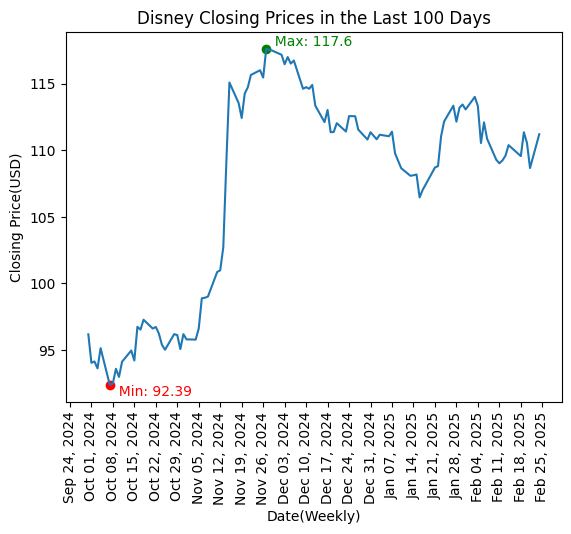

In [4]:
# plot closing prices against dates

plt.plot(dates, closing_prices)

plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d, %Y'))
plt.xticks(rotation=90)

plt.xlabel('Date(Weekly)')
plt.ylabel('Closing Price(USD)')
plt.title('Disney Closing Prices in the Last 100 Days')

# highlight max and min
plt.scatter(pd.to_datetime(date_max), max_price, color='green', label=f'Max: {max_price}')
plt.scatter(pd.to_datetime(date_min), min_price, color='red', label=f'Min: {min_price}')

plt.text(pd.to_datetime(date_max), max_price, f"  Max: {max_price}", color='green', verticalalignment='bottom')
plt.text(pd.to_datetime(date_min), min_price, f"  Min: {min_price}", color='red', verticalalignment='top')


plt.show()

In [5]:
# single share analysis

max_profit = 0
best_profit = ()

for i in range(len(closing_prices)):
  for j in range(i+1, len(closing_prices)):
    if (closing_prices[j] - closing_prices[i]) > max_profit:
      max_profit = (closing_prices[j] - closing_prices[i])
      best_profit = (closing_prices[i], closing_prices[j])

buy_date = sorted_dates[closing_prices.index(best_profit[0])]
sell_date = sorted_dates[closing_prices.index(best_profit[1])]
print("Buy on " + buy_date + " for $" + str(best_profit[0]) + ", and sell on " + sell_date + " for $" + str(best_profit[1]) + ".")
profit = round(best_profit[1]-best_profit[0], 2)
print("You will make $" + str(profit) + ".")

Buy on 2024-10-07 for $92.39, and sell on 2024-11-27 for $117.6.
You will make $25.21.


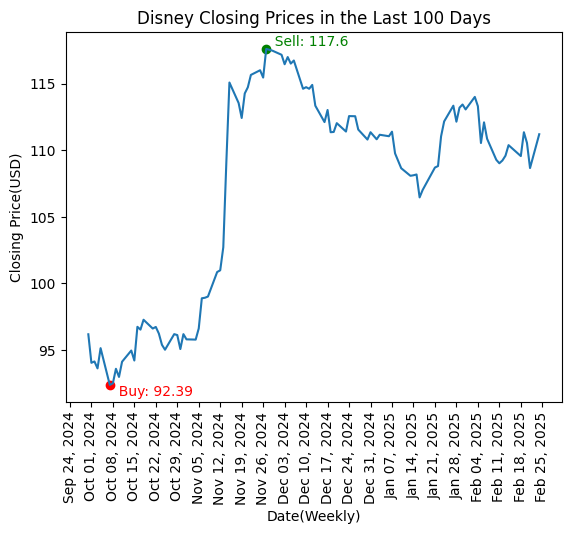

In [6]:
# regraph based on calculated results

plt.plot(dates, closing_prices)

plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d, %Y'))
plt.xticks(rotation=90)

plt.xlabel('Date(Weekly)')
plt.ylabel('Closing Price(USD)')
plt.title('Disney Closing Prices in the Last 100 Days')

plt.scatter(pd.to_datetime(sell_date), best_profit[1], color='green', label=f'Sell: {best_profit[1]}')
plt.scatter(pd.to_datetime(buy_date), best_profit[0], color='red', label=f'Buy: {best_profit[0]}')

plt.text(pd.to_datetime(sell_date), best_profit[1], f'  Sell: {best_profit[1]}', color='green', verticalalignment='bottom')
plt.text(pd.to_datetime(buy_date), best_profit[0], f'  Buy: {best_profit[0]}', color='red', verticalalignment='top')

plt.show()

Now with different stock symbols.

Buy on 2024-10-07 for $49.24, and sell on 2024-11-13 for $56.38.
You will make $7.14.


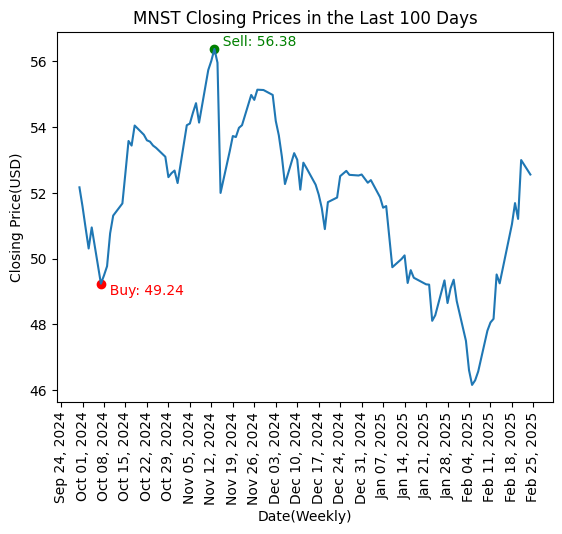

In [7]:
# function that takes in stock symbol and finds best times to buy and sell


def highest_stock_profit(stock_symbol):
  url = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=" + stock_symbol + "&outputsize=compact&apikey=1UMWVTKBKEGLJKQN"

  result = requests.get(url)
  d = result.json()

  closing_prices = []

  sorted_dates = sorted(d["Time Series (Daily)"].keys())

  dates = [pd.to_datetime(date) for date in sorted_dates]

  for date in sorted_dates:
      closing_prices.append(float(d["Time Series (Daily)"][date]["4. close"]))

  # single share analysis

  max_profit = 0
  best_profit = ()

  for i in range(len(closing_prices)):
    for j in range(i+1, len(closing_prices)):
      if (closing_prices[j] - closing_prices[i]) > max_profit:
        max_profit = (closing_prices[j] - closing_prices[i])
        best_profit = (closing_prices[i], closing_prices[j])

  buy_date = sorted_dates[closing_prices.index(best_profit[0])]
  sell_date = sorted_dates[closing_prices.index(best_profit[1])]
  print("Buy on " + buy_date + " for $" + str(best_profit[0]) + ", and sell on " + sell_date + " for $" + str(best_profit[1]) + ".")
  profit = round(best_profit[1]-best_profit[0], 2)
  print("You will make $" + str(profit) + ".")

  # graph based on calculated results

  plt.plot(dates, closing_prices)

  plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator())
  plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d, %Y'))
  plt.xticks(rotation=90)

  plt.xlabel('Date(Weekly)')
  plt.ylabel('Closing Price(USD)')
  plt.title(stock_symbol + ' Closing Prices in the Last 100 Days')

  plt.scatter(pd.to_datetime(sell_date), best_profit[1], color='green', label=f'Sell: {best_profit[1]}')
  plt.scatter(pd.to_datetime(buy_date), best_profit[0], color='red', label=f'Buy: {best_profit[0]}')

  plt.text(pd.to_datetime(sell_date), best_profit[1], f'  Sell: {best_profit[1]}', color='green', verticalalignment='bottom')
  plt.text(pd.to_datetime(buy_date), best_profit[0], f'  Buy: {best_profit[0]}', color='red', verticalalignment='top')

  plt.show()

highest_stock_profit("MNST")

**Part 2: Use and Analyze another Alphavantage**

In [8]:
import requests
from datetime import datetime

In [9]:
# getting data on the global price of sugar

url = "https://www.alphavantage.co/query?function=SUGAR&symbol=DIS&apikey=1UMWVTKBKEGLJKQN"
result = requests.get(url)
d = result.json()

# find the average price of sugar each year for the past 10 years

# filter data for last 10 years

current_year = datetime.now().year

sugar_prices = []

for i in d["data"]:
    year = int(i["date"][:4])
    if current_year - year < 11:
        sugar_prices.append(i)

# calculate yearly averages

def average(year):
  adding = 0
  for entry in sugar_prices:
    if int(entry["date"][0:4]) == year:
      adding += float(entry["value"])

  return round(adding/12, 2)

years = [2024, 2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015]

averages_list = []

for year in years:
  averages_list.append((year, average(year)))

print(averages_list)

[(2024, 20.74), (2023, 24.04), (2022, 18.83), (2021, 17.86), (2020, 12.88), (2019, 12.35), (2018, 12.25), (2017, 15.83), (2016, 18.14), (2015, 13.22)]


Extra Credit

In [ ]:
!pip install darts
import pandas as pd
from darts import TimeSeries
import requests
from darts.metrics import rmse

In [12]:
# used the monthly stock series instead of daily to match sugar
stock_url = "https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=DIS&apikey=1UMWVTKBKEGLJKQN"
sugar_url = "https://www.alphavantage.co/query?function=SUGAR&symbol=DIS&apikey=1UMWVTKBKEGLJKQN"
stock_result = requests.get(stock_url)
sugar_result = requests.get(sugar_url)

stock_data = stock_result.json()
sugar_data = sugar_result.json()

In [13]:
# find stock averages

def stock_average(year, dataset):
    adding = 0
    for date, values in dataset["Monthly Time Series"].items():
        if int(date[:4]) == year:
            adding += float(values["4. close"])
    return round(adding / 12, 2)

years = [2024, 2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015]

stock_averages_list = [(stock_average(year, stock_data)) for year in years]

# finding sugar averages

sugar_averages_list = []

for year in years:
  sugar_averages_list.append((average(year)))

date_index = pd.date_range(start=f"{years[-1]}-01-01", periods=len(years), freq="YE")

stock_series = TimeSeries.from_times_and_values(date_index, stock_averages_list)
sugar_series = TimeSeries.from_times_and_values(date_index, sugar_averages_list)


root_mean_squared_error = rmse(stock_series, sugar_series)
print(round(root_mean_squared_error, 2))


102.1


In [14]:
# Disney stock vs Monster stock

mnst_stock_url = "https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=MNST&apikey=1UMWVTKBKEGLJKQN"

mnst_result = requests.get(mnst_stock_url)

mnst_data = mnst_result.json()

mnst_averages_list = [(stock_average(year, mnst_data)) for year in years]

mnst_series = TimeSeries.from_times_and_values(date_index, mnst_averages_list)

stock_rmse = rmse(stock_series, mnst_series)
print(round(stock_rmse, 2))

50.94


<br>
<hr>
<br>

### You're off and ~~running~~ **API'ing** !

There's no stopping now...

Include in this notebook - below - a short 4-6 sentence summary of
+ Which of your two (or more) stocks offers better "profit" opportunity -- for a single-share -- if you had a time machine that worked for the past 100 days?
+ What other API did you choose to try? What did you analyze from it?
+ How difficult/accessible did you find the Alphavantage documentation?
+ You're welcome to use AI for help + debugging
  + what are your thoughts: &nbsp; Was AI helpful on this?  &nbsp;&nbsp;  Was AI <i>un</i>helpful on this? &nbsp; Both? &nbsp; Neither?
+ Big-picture, how the API'ing and Python'ing went overall?


### Markdown cell for thoughts on this API/JSON/Python "API and Analysis" challenge:

Feel free to use this cell for that reflection...

In part one, I compared Disney stock and Moster stock. This was interesting because Disney had a buy and sell price that was the same as the minimum and maximum. A lot of other stocks I tested with my function did as well. Monster stock is different because it had a buy and sell price different from its 100 day minumum and maximum combination. Disney has a much better profit opportunity because the difference between buy and sell price is much higher.

In part two, I chose the sugar prices API. I analyzed average sugar prices per year for a decade. I thought the Alphavantage documentation was easy to read through and it wasn't too difficult to use. I used AI for debugging and it was very helpful, especially with interpreting error messages. I think this went well overall and I enjoyed the lab.

For the extra credit, I found the root mean squared error for the stocks and sugar data. I got 102.1 which means that they data values are very different.

I then compared Disney and Monster stock. I got a value of 50.94 which means the stock prices vary a good amount.

### Lab/Office hours...

We'll have in-lab grutoring hours, in HMC's McGregor 205:
+ Thursday, 2/13 from 7-9pm
+ Friday, 2/14 from 1:30-3pm
+ Sunday, 2/16 from 7:30-9:30pm

<br>

### Submitting...

This "API + Analysis" challenge will be due:
+ now, <font color="DarkRed">Sunday</font> evening @ 11pm  (Feb. 16th)  
+ Download this notebook and Submit to GradeScope
+ Join Econ176 by adding Gradescope course code <tt><b>R7G3NG</b></tt>

Onward!